# In-Class Quiz Nº 1

<hr style="border:1px  solid black"> </hr>

### (Fill in)
## Name: Ana Sofia Oliveira
## Number: 39275

<hr style="border:1px  solid black"> </hr>

## Develop and run the requested code in the cells immediately below the questions.

# IMPORTANT:
## Once completed, save this Jupyter notebook with the following name:
## Axxxxx-Q1.ipynb (Axxxxx: student number)
##  and then upload the file to the Moodle link provided for that purpose.

<hr style="border:2px solid black"> </hr>

# Data: $\texttt{WhiteWine.p}$ dataset.
### Consider the dataset  divided into two sub-sets, training/testing, according to the commands in the next cell.
* ### X1: training data ($3398\times11$ array)
* ### y1: classes of the training data
* ### X2: test data (array de $1500\times11$)
* ### y2: classes of the test data

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import  train_test_split
pFile='WitheWine.p'
D=pickle.load(open(pFile,'rb'))
X=D.data
y=D.target

#division int training and test sub-sets
X1,X2,y1,y2=train_test_split(X,y,test_size=1500,stratify=y,random_state=42)

# Question 1:
##  Consider a $\texttt{RandomForestClassifier}$  with the following parameter $\texttt{random\_state=42}$.
### a) Check which values for the parameters $\texttt{n\_estimators}$ and $\texttt{max\_depth}$ give the best score - use the function $\texttt{GridSearchCV}$ with 3 folds on $\texttt{X1}$. Test the following values for the parameter $\texttt{n\_estimators}$: 50, 75, 100 and 125 and for  $\texttt{max\_depth}$: 10 and 15.
### b) How many models were trained/tested in 1.a) ?
### c) Train the classifier with the whole training data and with the best parameters. Print the total number of errors and the confusion matrix for the test data.¶
### c) Print the percentage of errors in each class in the test set.

## 1.a)

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(random_state=42).fit(X1, y1)

parameters = {'n_estimators':[50, 75, 100, 125], 'max_depth':[10, 15]}

grid_search = GridSearchCV(rf, parameters, cv=3)
grid_search.fit(X1, y1)
GridSearchCV(estimator=rf,
             param_grid=parameters)


print("Best Score: ", grid_search.best_score_)
print("Best Parameters: ", grid_search.best_params_)

Best Score:  0.6350745438535758
Best Parameters:  {'max_depth': 15, 'n_estimators': 125}


## 1.b)

In [10]:
# Com 3 folds nos dados de treino e 8 models por cada fold. Foram treinados e testados 8 * 3 = 24 modelos.

## 1.c)

In [11]:
from sklearn.metrics import confusion_matrix

rf = RandomForestClassifier(random_state=42, n_estimators=125, max_depth=15).fit(X1, y1)
y2e = rf.predict(X2)

print("Número Total de Erros: ", np.sum(y2 != y2e))
print("Matriz de Confusão: \n", confusion_matrix(y2, y2e))


Número Total de Erros:  497
Matriz de Confusão: 
 [[  0   0   1   4   1   0   0]
 [  0   7  28  15   0   0   0]
 [  0   4 308 134   0   0   0]
 [  0   1  90 531  51   0   0]
 [  0   0   6 128 134   1   0]
 [  0   0   0  16  15  23   0]
 [  0   0   0   1   1   0   0]]


## 1.d)

In [12]:
for i in range(3, 10):
    print("Erro na classe ", i, ": ", np.round(np.sum(y2[y2 != y2e] == i) / np.sum(y2 == i) * 100, 2), "%")


Erro na classe  3 :  100.0 %
Erro na classe  4 :  86.0 %
Erro na classe  5 :  30.94 %
Erro na classe  6 :  21.1 %
Erro na classe  7 :  50.19 %
Erro na classe  8 :  57.41 %
Erro na classe  9 :  100.0 %


<hr style="border:2px solid black"> </hr>

# Question 2:
## This question is to convert the multi-class data into binary data.
### a) Eliminate the examples of class  6 in the whole dataset. Consider as negative examples the ones from classes 3, 4 and 5, and the positive exemples the ones from the remaing classes.
### b) Shuffle the resulting dadaset. Before shuffeling, execute the following command: $\texttt{np.random.seed(42)}$
### c) Divide the data into a training and test set. Use the first 1500 examples for training and the rest for testing.

### 2.a)

In [13]:
# Remover exemplos da classe 6
X1 = X1[y1 != 6]
y1 = y1[y1 != 6]

X2 = X2[y2 != 6]
y2 = y2[y2 != 6]

# Negativos: Exemplos das classes 3, 4 e 5
y1[(y1 == 3) | (y1 == 4) | (y1 == 5)] = 0
y2[(y2 == 3) | (y2 == 4) | (y2 == 5)] = 0

# Positivos: Exemplos das restantes classes (7, 8 e 9)
y1[(y1 != 0)] = 1
y2[(y2 != 0)] = 1



### 2.b)

In [14]:
X = np.concatenate((X1, X2), axis=0)
y = np.concatenate((y1, y2), axis=0)

np.random.seed(42)
idx = np.random.permutation(len(y))
X = X[idx]
y = y[idx]

### 2.c)

In [15]:
# Primeiros 1500 exemplos para teste
X1 = X[:1500]
y1 = y[:1500]

# Restantes exemplos para treino
X2 = X[1500:]
y2 = y[1500:]

print("Dados de Treino: ", X1.shape, y1.shape)
print("Dados de Teste: ", X2.shape, y2.shape)

Dados de Treino:  (1500, 11) (1500,)
Dados de Teste:  (1200, 11) (1200,)


<hr style="border:2px solid black"> </hr>

# Question 3 - SVMs:
## Consider the binary data obtained in Question 2
## Consider a $\texttt{SVC}$ classifier with the following parameters: $\texttt{kernel='rbf'}$ and $\texttt{C=2}$.
### a) Train the $\texttt{SVC}$ classifier with the training data. Print the confusion matrix and the total number of errors for the test data.
### b) Preprocess the data using the function  $\texttt{StandardScaler}$, and train the $\texttt{SVC}$ classifier with the training data. Print the confusion matrix and the total number of errors for the test data.
### c) For the test data, plot the ROC curves and the Precision and Recall curves for both classifiers (2 curves per figure). Include in these plots the operating point of the classifiers.


## 2.a)

In [16]:
from sklearn.svm import SVC

svm1 = SVC(kernel='rbf', C=2).fit(X1, y1)
y2e = svm1.predict(X2)

print("Número Total de Erros: ", np.sum(y2 != y2e))
print("Matriz de Confusão: \n", confusion_matrix(y2, y2e))

Número Total de Erros:  318
Matriz de Confusão: 
 [[616 107]
 [211 266]]


## 2.b)

In [17]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler().fit(X1)
X1n = sc.transform(X1)
X2n = sc.transform(X2)

svm2 = SVC(kernel='rbf', C=2).fit(X1n, y1)
y2e = svm2.predict(X2n)

print("Número Total de Erros: ", np.sum(y2 != y2e))
print("Matriz de Confusão: \n", confusion_matrix(y2, y2e))


Número Total de Erros:  160
Matriz de Confusão: 
 [[645  78]
 [ 82 395]]


## 2.c)

Text(0, 0.5, 'TP-rate')

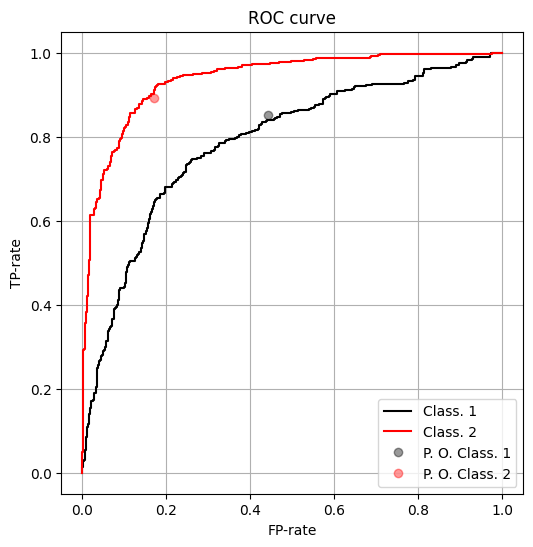

In [18]:
from sklearn.metrics import roc_curve

y2c1 = svm1.decision_function(X2)
y2c2 = svm2.decision_function(X2n)

fpr1,tpr1,t1 = roc_curve(y2,y2c1)
fpr2,tpr2,t2 = roc_curve(y2,y2c2)


# Classificador 1
# fp-rate=FP/(FP+TN)
p11 = 211  / (211 + 266)
# tp-rate=TP/(TP+FN)
p12 = 616 / (616 + 107)

# Classificador 2
# fp-rate=FP/(FP+TN)
p21 = 82 / (82 + 395)
# tp-rate=TP/(TP+FN)
p22 = 645 / (645 + 78)

plt.figure(figsize=(6, 6))
plt.plot(fpr1, tpr1, '-k')
plt.plot(fpr2, tpr2, '-r')
plt.plot(p11, p12, "ok", alpha=.4)
plt.plot(p21, p22, "or", alpha=.4)

plt.legend(["Class. 1", "Class. 2", "P. O. Class. 1", "P. O. Class. 2"])
plt.axis("scaled")
plt.grid(True)
plt.title("ROC curve")
plt.xlabel("FP-rate")
plt.ylabel("TP-rate")